In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-26 to 2019-07-05 - 62'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 6) & (stat['shrp'] > 0.6)]
print(len(stat))
stat

14


,len,mean,std,shrp,drawdown
Symbols,,,,,
XLU,29,2.611382,1.538810,1.593863,3.237646
VPU,29,2.492555,1.509435,1.546157,3.258989
XAR,29,3.392686,2.287158,1.413963,2.579733
EMLP,29,1.578096,1.082259,1.311484,2.697335
IGF,29,2.860889,2.060409,1.311467,2.242252
FXU,29,1.907029,1.506312,1.160648,4.221547
IHI,29,5.048735,4.239035,1.153566,4.510425
IXJ,29,3.033473,2.776446,1.035404,3.337207
XLV,29,2.931758,2.953785,0.938805,3.729859


Populating the interactive namespace from numpy and matplotlib
evicted VDC 0.996533021462804
evicted IYH 0.9989936741892138
evicted VPU 0.996304121216835
evicted VHT 0.9997864443073831
evicted XLV 0.9969245343029112
evicted FHLC 0.9945838366929206
evicted XLP 0.9351296585266893
evicted IGF 0.9267749980469064
evicted FXU 0.8223274569654576
evicted IXJ 0.9695230404785862
evicted EMLP 0.7116253641704314
evicted IHI 0.8798012579509327
{'XAR': 0.33, 'XLU': 0.67}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,2.866287,1.517384,-0.623093,2.167225,3.116602,3.864435,5.127673,1.784358,2.180717
XLU,29.0,2.611382,1.538810,-1.090107,1.753641,2.968049,3.213617,6.139276,1.593863,3.237646
XAR,29.0,3.392686,2.287158,-1.149201,1.821142,3.610879,5.167068,7.783228,1.413963,2.579733


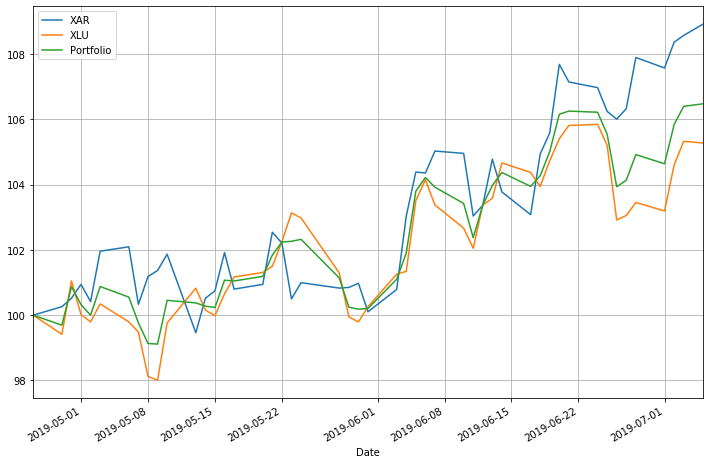

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)